In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from iminuit import Minuit
from pylab import *
from pprint import pprint

#
#
# This first block will simply read our data as an excel file (dataframe object)
# and then convert it to an array we can work with in numpy

excel = pd.read_excel (r'/Users/caleb/CMS/Tracker/e-links/eLink_Instrumentation/JupyterScripts/DC4pt_Data.xlsx')
#excel2 = pd.read_excel (r'C:\Users\bruen\DC4ptAnalysis\SimplifiedData.xlsx')

data = excel.to_numpy() # Converts data from a dataframe to an array
#data2 = excel2.to_numpy()
data1 = data[:,0:10]

#display(excel1)

In [14]:
# This block will slice our data into the specific rows and column we want to plot

p_three_five = data1[0:5] # Slicing our arrays based on their lengths
p_eight_zero = data1[5:10]
one_p_zero = data1[10:15]
one_p_four = data1[15:20]
one_p_six = data1[20:32]
one_p_eight = data1[32:42]
two_p_zero = data1[42:45]

# Slice our data into specific channels

D3_1 = p_three_five[:,0:2]
D2_1 = p_three_five[:,2:4] # We now have 5 arrays for the .35 meter e-links separated into their different channels
D1_1 = p_three_five[:,4:6]
D0_1 = p_three_five[:,6:8]
CMD_1 = p_three_five[:,8:10]

D3_2 = p_eight_zero[:,0:2] # .8 meter wire
D2_2 = p_eight_zero[:,2:4]
D1_2 = p_eight_zero[:,4:6]
D0_2 = p_eight_zero[:,6:8]
CMD_2 = p_eight_zero[:,8:10]

D3_3 = one_p_zero[:,0:2] # 1 meter wire
D2_3 = one_p_zero[:,2:4]
D1_3 = one_p_zero[:,4:6]
D0_3 = one_p_zero[:,6:8]
CMD_3 = one_p_zero[:,8:10]

D3_4 = one_p_four[:,0:2] # 1.4 meter wire
D2_4 = one_p_four[:,2:4]
D1_4 = one_p_four[:,4:6]
D0_4 = one_p_four[:,6:8]
CMD_4 = one_p_four[:,8:10]

D3_5 = one_p_six[:,0:2] # 1.6 meter wire
D2_5 = one_p_six[:,2:4]
D1_5 = one_p_six[:,4:6]
D0_5 = one_p_six[:,6:8]
CMD_5 = one_p_six[:,8:10]

D3_6 = one_p_eight[:,0:2] # 1.8 meter wire
D2_6 = one_p_eight[:,2:4]
D1_6 = one_p_eight[:,4:6]
D0_6 = one_p_eight[:,6:8]
CMD_6 = one_p_eight[:,8:10]

D3_7 = two_p_zero[:,0:2] # 2 meter wire
D2_7 = two_p_zero[:,2:4]
D1_7 = two_p_zero[:,4:6]
D0_7 = two_p_zero[:,6:8]
CMD_7 = two_p_zero[:,8:10]


<ErrorbarContainer object of 3 artists>

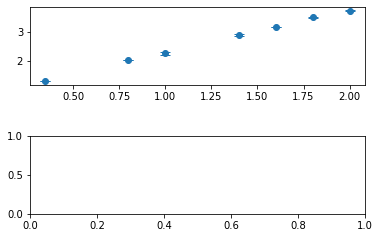

In [15]:
# In this block, we can calculate our averages or errors for any of the arrays above
# We can plot these values against specific length or channels

# Averages over each different length
avg1 = np.mean(p_three_five)
avg2 = np.mean(p_eight_zero)
avg3 = np.mean(one_p_zero)
avg4 = np.mean(one_p_four)
avg5 = np.mean(one_p_six)
avg6 = np.mean(one_p_eight)
avg7 = np.mean(two_p_zero)

avgs_over_lengths = np.array([avg1,avg2,avg3,avg4,avg5,avg6,avg7]) # Creates an array of our averages

# Errors for the average resistance in each length
std1 = np.std(p_three_five)
std2 = np.std(p_eight_zero)
std3 = np.std(one_p_zero)
std4 = np.std(one_p_four)
std5 = np.std(one_p_six)
std6 = np.std(one_p_eight)
std7 = np.std(two_p_zero)
err1 = std1 / (np.sqrt(p_three_five.size))
err2 = std2 / (np.sqrt(p_eight_zero.size))
err3 = std3 / (np.sqrt(one_p_zero.size))
err4 = std4 / (np.sqrt(one_p_four.size))
err5 = std5 / (np.sqrt(one_p_six.size))
err6 = std6 / (np.sqrt(one_p_eight.size))
err7 = std7 / (np.sqrt(two_p_zero.size))

error_eachlength = np.array([err1,err2,err3,err4,err5,err6,err7])

# Change digit after underscore to calculate error for a different wire
error_1 = np.array([np.std(D0_1)/((D0_1.size)^2),np.std(D1_1)/((D1_1.size)^2),np.std(D2_1)/((D2_1.size)^2),np.std(D3_1)/((D3_1.size)^2),np.std(CMD_1)/((CMD_1.size)^2)])

# To change plot 2 to a different wire, change the digit after the underscore
avg_overchannel1 = np.array([np.mean(D0_1),np.mean(D1_1),np.mean(D2_1),np.mean(D3_1),np.mean(CMD_1)])


# Creating both of our y axes
lengths = np.array([.35,.80,1.00,1.40,1.60,1.80,2.00], dtype=float)
channels = np.array([1,2,3,4,5])

fig, ax = plt.subplots(2,1) # Creates a 2 row 1 column figure space for us to plot in
fig.tight_layout(pad=3)

# First plot, average resistance vs lengths
ax[0].errorbar(lengths,avgs_over_lengths,yerr=error_eachlength,capsize=5,fmt='o')

# Second plot: average resistance vs channels for shortest wire
# ax[1].errorbar(channels,avg_overchannel1,yerr=error_1,capsize=5,fmt='o')
    

 
 Fitting parameters
a = 0.8142397142169101 +- 0.014458949585646402
b = 1.4722240037792942 +- 0.010402916557542266
errors:  [0.00545673 0.00536577 0.04591949 0.02069449 0.00415915 0.01467949
 0.01202378]
 
chi square: 18.970724437786266
number of degrees of freedom: 5
reduced chi square: 3.794144887557253


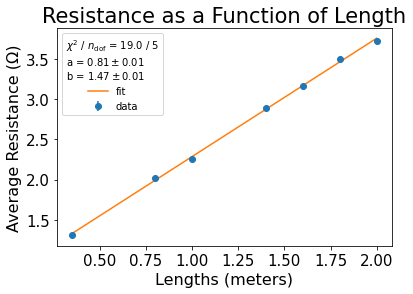

In [16]:
# This final block will perform a linear fit over the resistance vs length column

# Define a few dummy error functions to test if our fit is working
dummy1 = np.array([.2,.2,.2,.2,.2,.2,.2])
dummy2 = np.array([.025,.025,.025,.025,.025,.025,.025])
dummy3 = np.array([.1,.1,.1,.1,.1,.1,.1])
tfpx_error = .015

# We first define our linear fit and our chi squared function
# Linear fit function
def model(x,a,b):
    return a + b*x 
# Chi squared function
def least_squares(a,b):
    return sum(((avgs_over_lengths - model(lengths,a,b))**2 / tfpx_error**2))

m = Minuit(least_squares,a=0,b=0)
m.migrad() # finds minimum of least_squares function
m.hesse() # computes errors

plt.errorbar(lengths,avgs_over_lengths,yerr=tfpx_error, fmt="o", label="data")
plt.plot(lengths, model(lengths, *m.values), label="fit")
plt.xlabel('Lengths (meters)',fontsize=16)
plt.ylabel('Average Resistance (Ω)',fontsize=16)
plt.title('Resistance as a Function of Length',fontsize=21)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(lengths) - m.nfit}",]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.2f} \\pm {e:.2f}$")

plt.legend(title="\n".join(fit_info));

print(' ')
print(' Fitting parameters')
for p in m.parameters:
    print("{} = {} +- {}".format(p,m.values[p], m.errors[p]))
    
print('errors: ', error_eachlength)

print(' ')
print('chi square:', m.fval)
print('number of degrees of freedom:', (len(avgs_over_lengths)- len(m.parameters)))
print('reduced chi square:', m.fval / (len(avgs_over_lengths) - len(m.parameters)) )

show()

